# Predicting the amount of beer consumed

## Introduction

Beer is one of the oldest and most widely consumed alcoholic drinks in the world, and the third most popular drink overall after water and tea. Beer is brewed from cereal grains—most commonly from malted barley, though wheat, maize (corn), rice, and oats are also used [1].

Beer is one of the most democratic and consumed drinks in the world. Not without reason, it is perfect for almost every situation, from happy hour to large wedding parties. If you just think about it, you already feel like having a beer, you’re not alone.

## Dataset

The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with period of one year.

Link to dataset: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo/download

In [1]:
# Needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Reading my dataset
df = pd.read_csv('Consumo_cerveja.csv')

## Data exploation

In [3]:
df.head() # first five rows

Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27,3                   23,9   
1  2015-01-02                 27,02                   24,5   
2  2015-01-03                 24,82                   22,4   
3  2015-01-04                 23,98                   21,5   
4  2015-01-05                 23,82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32,5                 0              0.0   
1                   33,5                 0              0.0   
2                   29,9                 0              1.0   
3                   28,6               1,2              1.0   
4                   28,3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [4]:
df.tail() # last five rows

Data Temperatura Media (C) Temperatura Minima (C) Temperatura Maxima (C)  \
936  NaN                   NaN                    NaN                    NaN   
937  NaN                   NaN                    NaN                    NaN   
938  NaN                   NaN                    NaN                    NaN   
939  NaN                   NaN                    NaN                    NaN   
940  NaN                   NaN                    NaN                    NaN   

    Precipitacao (mm)  Final de Semana  Consumo de cerveja (litros)  
936               NaN              NaN                          NaN  
937               NaN              NaN                          NaN  
938               NaN              NaN                          NaN  
939               NaN              NaN                          NaN  
940               NaN              NaN                          NaN

In [5]:
df.shape # shape of dataframe

(941, 7)

In [6]:
df.info() # information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [7]:
df.isnull().sum() # check missing values

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

Each column has 576 missing values

In [8]:
#Replace commas with decimal points

In [8]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',', '.')
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',', '.')
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',', '.')
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',', '.')

In [9]:
df.head()

Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27.3                   23.9   
1  2015-01-02                 27.02                   24.5   
2  2015-01-03                 24.82                   22.4   
3  2015-01-04                 23.98                   21.5   
4  2015-01-05                 23.82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32.5                 0              0.0   
1                   33.5                 0              0.0   
2                   29.9                 0              1.0   
3                   28.6               1.2              1.0   
4                   28.3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [11]:
## Converting object to floating numbers

In [10]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype(float)
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].astype(float)
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].astype(float)
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].astype(float)

In [11]:
df.head()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0  2015-01-01                  27.30                    23.9   
1  2015-01-02                  27.02                    24.5   
2  2015-01-03                  24.82                    22.4   
3  2015-01-04                  23.98                    21.5   
4  2015-01-05                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0              0.0   
1                    33.5                0.0              0.0   
2                    29.9                0.0              1.0   
3                    28.6                1.2              1.0   
4                    28.3                0.0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [12]:
df['Data'] = pd.to_datetime(df['Data'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.6 KB


In [17]:
df1=df.dropna()

In [18]:
df1.head()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0 2015-01-01                  27.30                    23.9   
1 2015-01-02                  27.02                    24.5   
2 2015-01-03                  24.82                    22.4   
3 2015-01-04                  23.98                    21.5   
4 2015-01-05                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0              0.0   
1                    33.5                0.0              0.0   
2                    29.9                0.0              1.0   
3                    28.6                1.2              1.0   
4                    28.3                0.0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [15]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [16]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
pandas_profiling.ProfileReport(df1)

C:\Users\mbahc\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df.describe()

Temperatura Media (C)  Temperatura Minima (C)  Temperatura Maxima (C)  \
count             365.000000              365.000000              365.000000   
mean               21.226356               17.461370               26.611507   
std                 3.180108                2.826185                4.317366   
min                12.900000               10.600000               14.500000   
25%                19.020000               15.300000               23.800000   
50%                21.380000               17.900000               26.900000   
75%                23.280000               19.600000               29.400000   
max                28.860000               24.500000               36.500000   

       Precipitacao (mm)  Final de Semana  Consumo de cerveja (litros)  
count         365.000000       365.000000                   365.000000  
mean            5.196712         0.284932                    25.401367  
std            12.417844         0.452001                     4.399143  
min             0.000000         0.000000                    14.343000  
25%             0.000000         0.000000                    22.008000  
50%             0.000000         0.000000                    24.867000  
75%             3.200000         1.000000                    28.631000  
max            94.800000         1.000000                    37.937000

In [18]:
df['year'],df['month'],df['day'] = df.Data.dt.year, df.Data.dt.month, df.Data.dt.day

In [19]:
df.head()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0 2015-01-01                  27.30                    23.9   
1 2015-01-02                  27.02                    24.5   
2 2015-01-03                  24.82                    22.4   
3 2015-01-04                  23.98                    21.5   
4 2015-01-05                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0              0.0   
1                    33.5                0.0              0.0   
2                    29.9                0.0              1.0   
3                    28.6                1.2              1.0   
4                    28.3                0.0              0.0   

   Consumo de cerveja (litros)    year  month  day  
0                       25.461  2015.0    1.0  1.0  
1                       28.972  2015.0    1.0  2.0  
2                       30.814  2015.0    1.0  3.0  
3                       29.799  2015.0    1.0  4.0  
4                       28.900  2015.0    1.0  5.0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
 7   year                         365 non-null    float64       
 8   month                        365 non-null    float64       
 9   day                          365 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 73.6 KB


In [21]:
df['month']= df['month'].astype(str)
df['month']= df['month'].replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0'], ['January', 'February', 'March',
                                                                                                                                    'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [22]:
df.head()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0 2015-01-01                  27.30                    23.9   
1 2015-01-02                  27.02                    24.5   
2 2015-01-03                  24.82                    22.4   
3 2015-01-04                  23.98                    21.5   
4 2015-01-05                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0              0.0   
1                    33.5                0.0              0.0   
2                    29.9                0.0              1.0   
3                    28.6                1.2              1.0   
4                    28.3                0.0              0.0   

   Consumo de cerveja (litros)    year    month  day  
0                       25.461  2015.0  January  1.0  
1                       28.972  2015.0  January  2.0  
2                       30.814  2015.0  January  3.0  
3                       29.799  2015.0  January  4.0  
4                       28.900  2015.0  January  5.0

## Data visualization

In [23]:
#rows of beer_consumption for the year 2015
df1= df.loc[df['year'] == 2015.0]
df1.head()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0 2015-01-01                  27.30                    23.9   
1 2015-01-02                  27.02                    24.5   
2 2015-01-03                  24.82                    22.4   
3 2015-01-04                  23.98                    21.5   
4 2015-01-05                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0              0.0   
1                    33.5                0.0              0.0   
2                    29.9                0.0              1.0   
3                    28.6                1.2              1.0   
4                    28.3                0.0              0.0   

   Consumo de cerveja (litros)    year    month  day  
0                       25.461  2015.0  January  1.0  
1                       28.972  2015.0  January  2.0  
2                       30.814  2015.0  January  3.0  
3                       29.799  2015.0  January  4.0  
4                       28.900  2015.0  January  5.0

### Bar plot of litre consumption  for 2015 vs Months

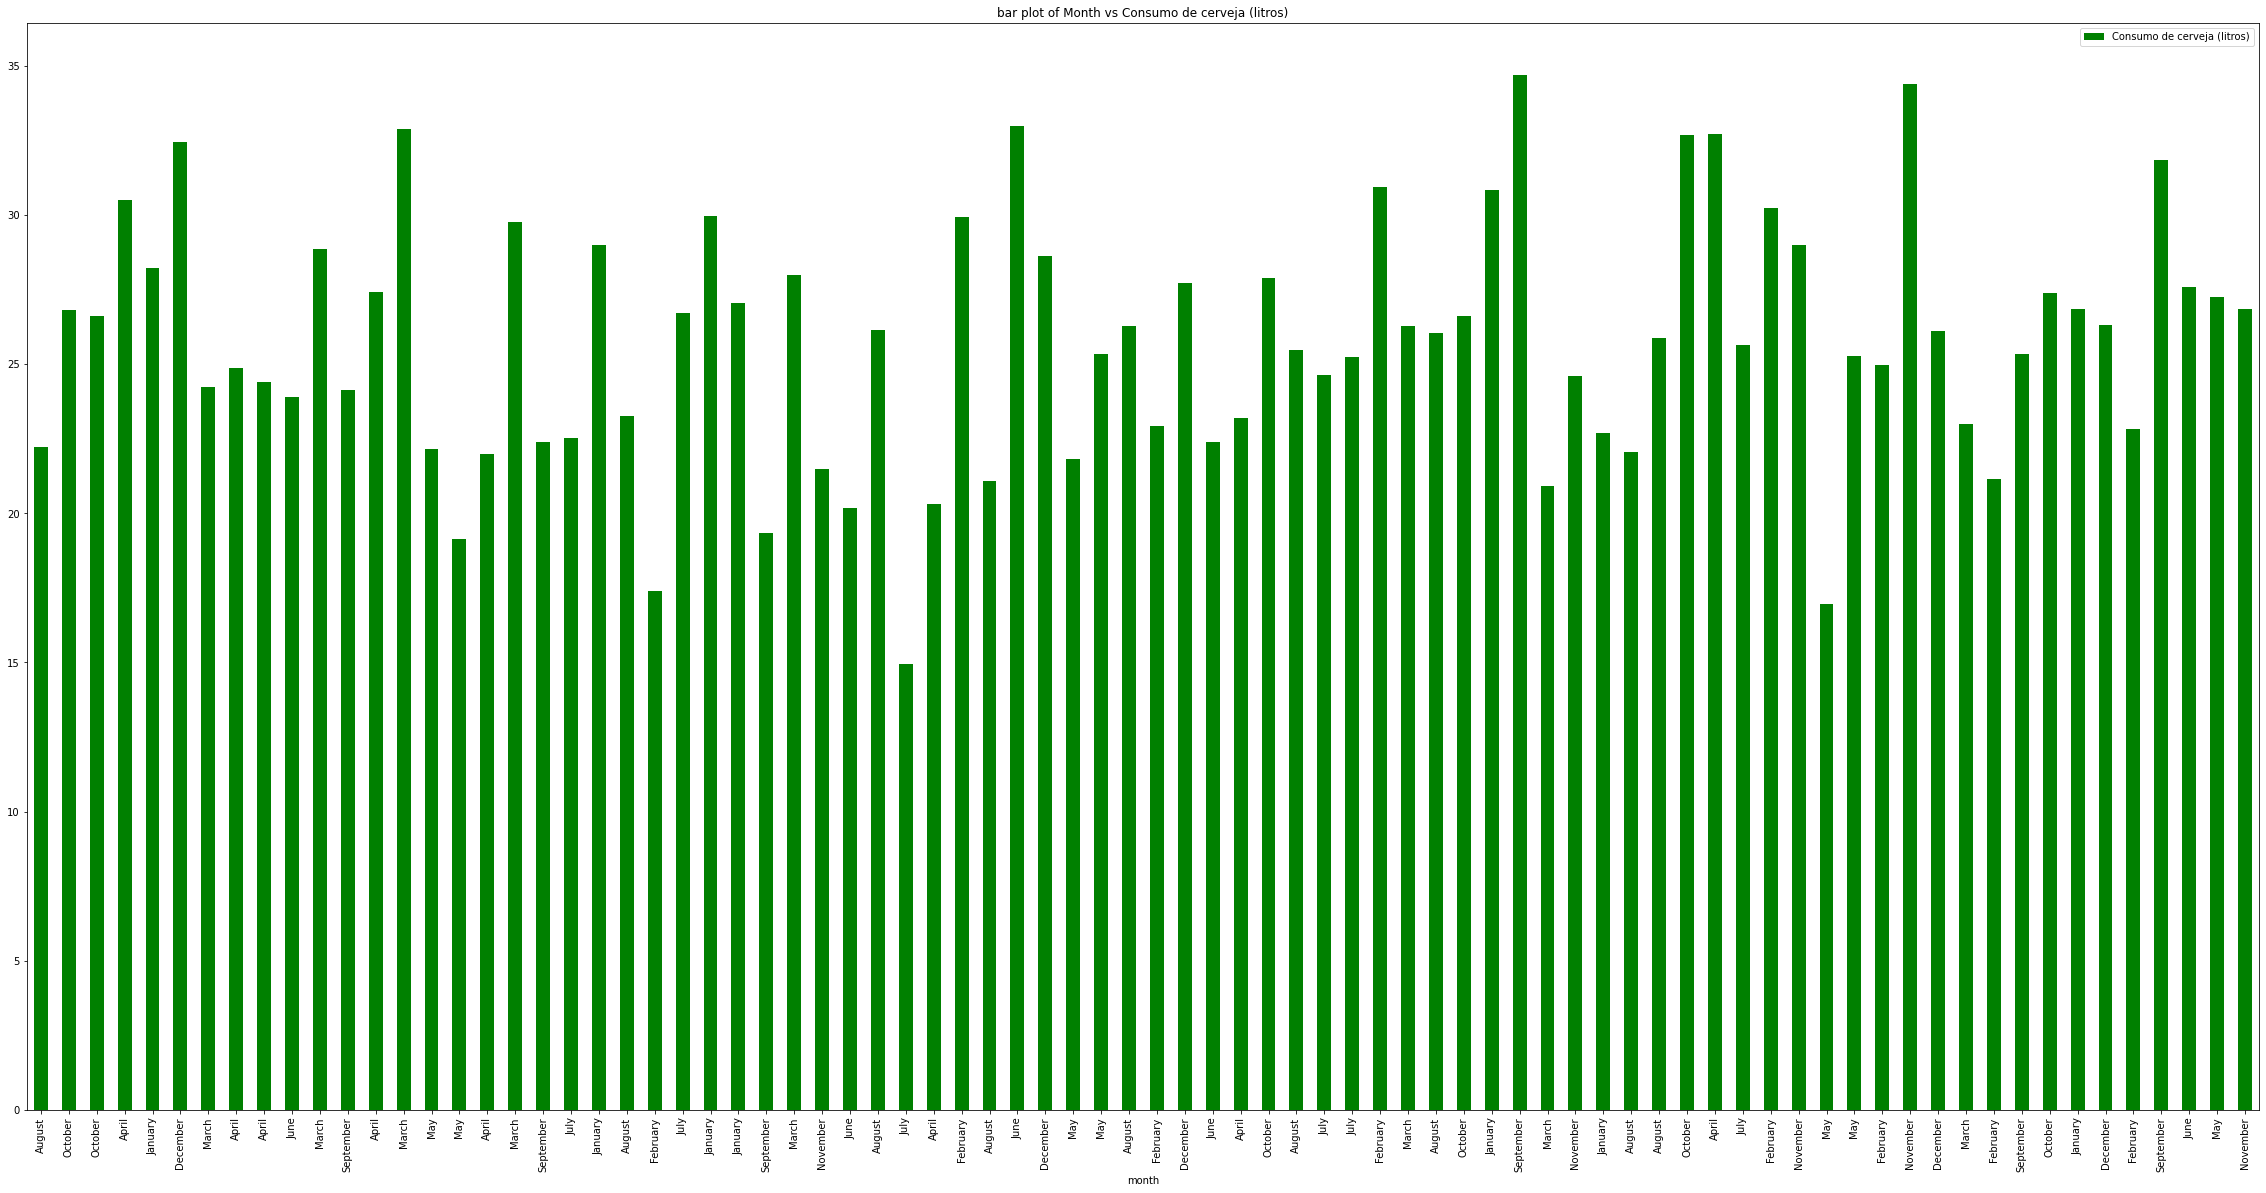

In [24]:
df1=df1.sample(80)
df1.plot(kind='bar',x='month',y='Consumo de cerveja (litros)', figsize=(40, 20), color='green', title='bar plot of Month vs Consumo de cerveja (litros)')

### Bar plot of litre consumption for the month of January

In [25]:
#rows of page views for the year 2015
df2= df.loc[df['month'] == 'January']
df2

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0  2015-01-01                  27.30                    23.9   
1  2015-01-02                  27.02                    24.5   
2  2015-01-03                  24.82                    22.4   
3  2015-01-04                  23.98                    21.5   
4  2015-01-05                  23.82                    21.0   
5  2015-01-06                  23.78                    20.1   
6  2015-01-07                  24.00                    19.5   
7  2015-01-08                  24.90                    19.5   
8  2015-01-09                  28.20                    21.9   
9  2015-01-10                  26.76                    22.1   
10 2015-01-11                  27.62                    22.2   
11 2015-01-12                  25.96                    21.4   
12 2015-01-13                  25.52                    21.2   
13 2015-01-14                  25.96                    21.3   
14 2015-01-15                  25.86                    21.5   
15 2015-01-16                  26.50                    22.3   
16 2015-01-17                  28.86                    22.0   
17 2015-01-18                  28.26                    23.4   
18 2015-01-19                  28.22                    22.7   
19 2015-01-20                  27.68                    23.3   
20 2015-01-21                  25.32                    22.7   
21 2015-01-22                  21.74                    19.2   
22 2015-01-23                  21.04                    18.5   
23 2015-01-24                  23.12                    19.0   
24 2015-01-25                  24.40                    18.1   
25 2015-01-26                  22.40                    18.9   
26 2015-01-27                  23.60                    20.5   
27 2015-01-28                  25.68                    20.1   
28 2015-01-29                  25.00                    21.5   
29 2015-01-30                  22.80                    20.9   
30 2015-01-31                  21.64                    18.5   

    Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                     32.5                0.0              0.0   
1                     33.5                0.0              0.0   
2                     29.9                0.0              1.0   
3                     28.6                1.2              1.0   
4                     28.3                0.0              0.0   
5                     30.5               12.2              0.0   
6                     33.7                0.0              0.0   
7                     32.8               48.6              0.0   
8                     34.0                4.4              0.0   
9                     34.2                0.0              1.0   
10                    34.8                3.4              1.0   
11                    35.4                0.0              0.0   
12                    34.8                0.8              0.0   
13                    34.0                1.6              0.0   
14                    32.8                3.0              0.0   
15                    32.7                2.0              0.0   
16                    35.8                0.0              1.0   
17                    35.6                0.0              1.0   
18                    36.5                3.7              0.0   
19                    35.6                0.6              0.0   
20                    30.9                0.0              0.0   
21                    26.1               31.0              0.0   
22                    26.1                3.6              0.0   
23                    29.4               13.0              1.0   
24                    30.0                0.0              1.0   
25                    28.7               20.8              0.0   
26                    28.7                1.2              0.0   
27                    29.9                4.9              0.0   
28                    29.2                0.0 

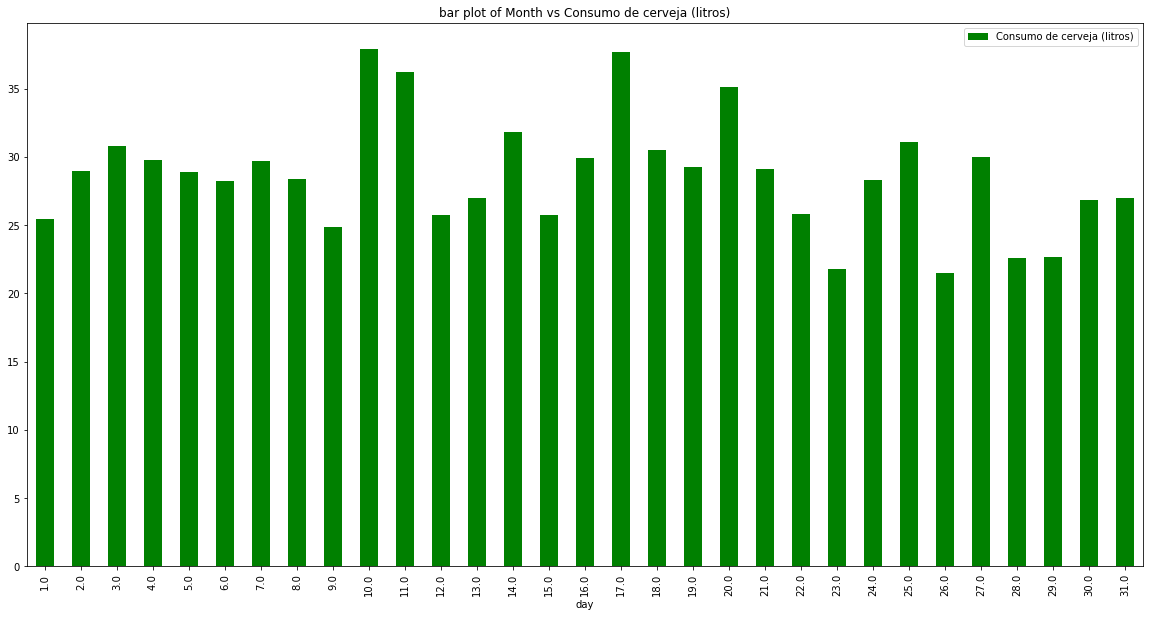

In [26]:
df2.plot(kind='bar',x='day',y='Consumo de cerveja (litros)', figsize=(20, 10), color='green', title='bar plot of Month vs Consumo de cerveja (litros)')

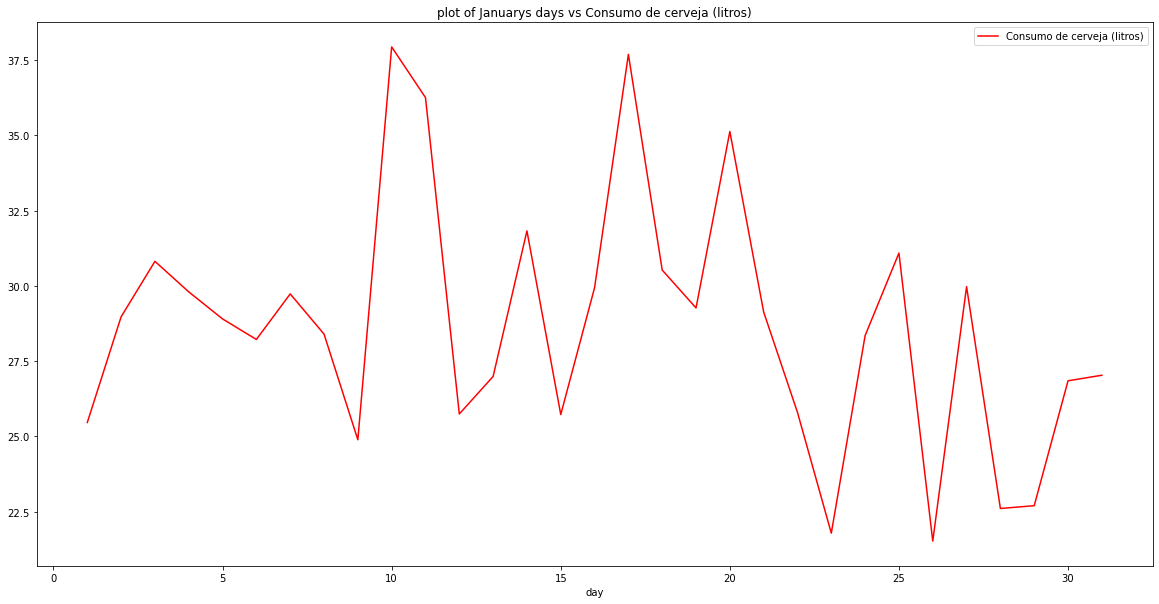

In [27]:
df2.plot(kind='line',x='day',y='Consumo de cerveja (litros)', color='red', figsize=(20,10), title = 'plot of Januarys days vs Consumo de cerveja (litros)')

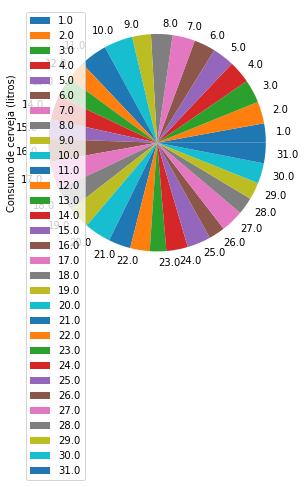

In [28]:
#Pie Chart
df2=df2.set_index('day')
plot = df2.plot.pie(y='Consumo de cerveja (litros)', figsize=(5, 5))

### Comments

The 10th and the 18th day has the highest rate of consumption for the month of January

The 23th and the 26th day has the lowest rate of beer consumption for the month of January

### Bar plot of litre consumption  for 2015 vs days of the month February

In [29]:
#rows of page views for the year 2015
df3= df.loc[df['month'] == 'February']
df3

Data  Temperatura Media (C)  Temperatura Minima (C)  \
31 2015-02-01                  24.16                    20.6   
32 2015-02-02                  22.48                    20.7   
33 2015-02-03                  23.16                    18.0   
34 2015-02-04                  22.12                    19.9   
35 2015-02-05                  20.28                    19.1   
36 2015-02-06                  21.06                    17.9   
37 2015-02-07                  21.86                    17.3   
38 2015-02-08                  22.76                    17.1   
39 2015-02-09                  24.00                    19.3   
40 2015-02-10                  23.92                    20.1   
41 2015-02-11                  25.38                    19.9   
42 2015-02-12                  27.66                    23.1   
43 2015-02-13                  25.54                    22.5   
44 2015-02-14                  24.32                    21.1   
45 2015-02-15                  22.90                    20.0   
46 2015-02-16                  21.60                    18.8   
47 2015-02-17                  22.76                    19.7   
48 2015-02-18                  22.22                    19.9   
49 2015-02-19                  23.92                    19.9   
50 2015-02-20                  24.72                    21.7   
51 2015-02-21                  25.20                    21.4   
52 2015-02-22                  24.44                    20.4   
53 2015-02-23                  25.40                    20.7   
54 2015-02-24                  24.30                    20.5   
55 2015-02-25                  22.24                    19.3   
56 2015-02-26                  24.10                    19.2   
57 2015-02-27                  24.64                    20.4   
58 2015-02-28                  22.40                    19.7   

    Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
31                    28.0                0.0              1.0   
32                    26.5                4.5              0.0   
33                    31.1                1.6              0.0   
34                    23.7                3.2              0.0   
35                    22.9                5.6              0.0   
36                    25.4               18.4              0.0   
37                    28.7               16.7              1.0   
38                    29.5               10.4              1.0   
39                    30.7                0.0              0.0   
40                    29.0               32.2              0.0   
41                    30.4                2.2              0.0   
42                    32.7                0.0              0.0   
43                    32.1                0.0              0.0   
44                    31.6                0.0              1.0   
45                    27.6               17.4              1.0   
46                    27.3               22.7              0.0   
47                    28.0               85.3              0.0   
48                    26.4               13.4              0.0   
49                    28.5                2.4              0.0   
50                    28.2                0.0              0.0   
51                    31.1                0.0              1.0   
52                    30.8                0.0              1.0   
53                    31.4                0.0              0.0   
54                    31.9                0.0              0.0   
55                    29.3                2.0              0.0   
56                    30.3               34.4              0.0   
57                    31.4                0.6              0.0   
58                    27.7                0.0              1.0   

    Consumo de cerveja (litros)    year     month   day  
31                       32.057  2015.0  February   1.0  
32                       24.097  2015.0  February   2.0  
33                       31.655  2015.0  February   3.0  
34   

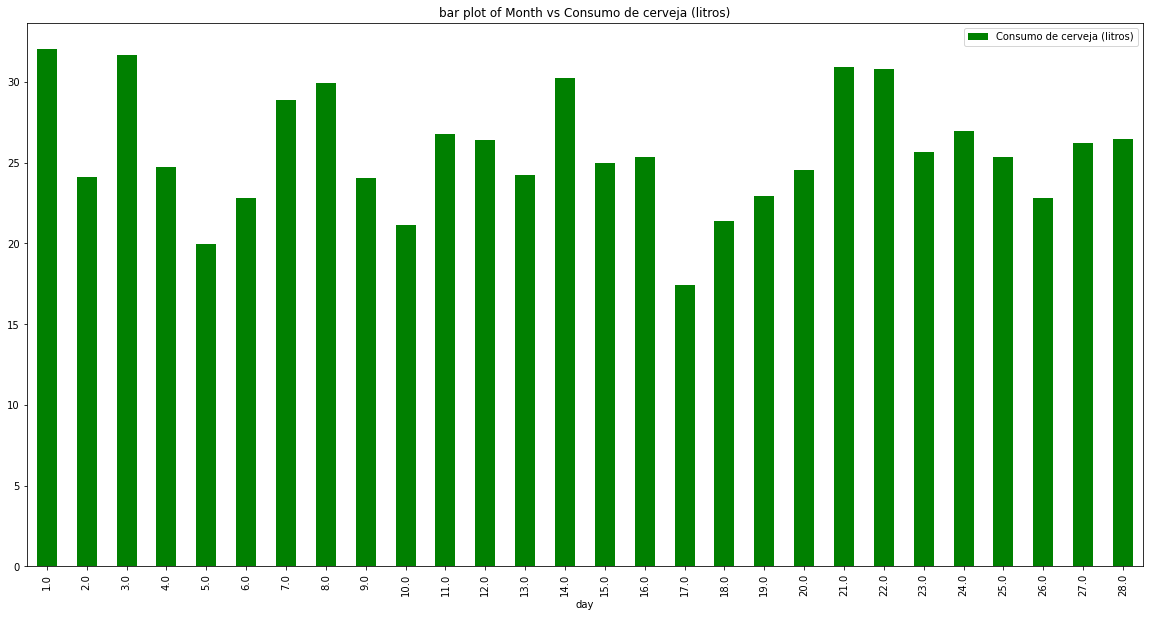

In [30]:
df3.plot(kind='bar',x='day',y='Consumo de cerveja (litros)', figsize=(20, 10), color='green', title='bar plot of Month vs Consumo de cerveja (litros)')

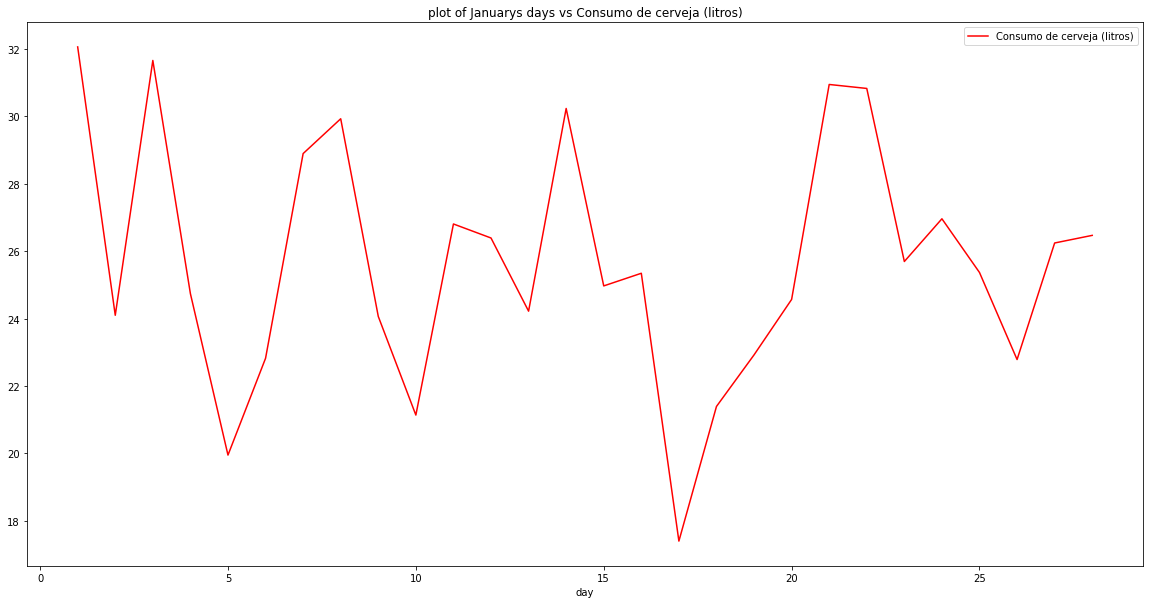

In [31]:
# Line plot
df3.plot(kind='line',x='day',y='Consumo de cerveja (litros)', color='red', figsize=(20,10), title = 'plot of Januarys days vs Consumo de cerveja (litros)')

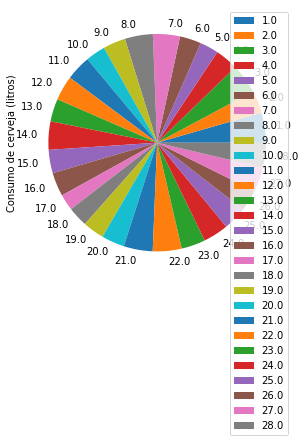

In [32]:
#Pie Chart
df3=df3.set_index('day')
plot = df3.plot.pie(y='Consumo de cerveja (litros)', figsize=(5, 5))

### Comments

1st day in February has the highest rate of consumption

The least consumption for the monh of February was on the 17th


In [33]:
#rows of page views for the year 2015
df4= df.loc[df['month'] == 'December']
df4

Data  Temperatura Media (C)  Temperatura Minima (C)  \
334 2015-12-01                  20.10                    16.4   
335 2015-12-02                  22.10                    18.2   
336 2015-12-03                  22.44                    20.2   
337 2015-12-04                  22.76                    19.0   
338 2015-12-05                  24.80                    19.5   
339 2015-12-06                  23.12                    20.6   
340 2015-12-07                  20.04                    18.0   
341 2015-12-08                  21.70                    18.0   
342 2015-12-09                  23.96                    19.6   
343 2015-12-10                  24.00                    22.2   
344 2015-12-11                  24.04                    20.7   
345 2015-12-12                  23.92                    20.6   
346 2015-12-13                  24.54                    19.3   
347 2015-12-14                  26.28                    21.1   
348 2015-12-15                  25.66                    20.6   
349 2015-12-16                  22.04                    20.7   
350 2015-12-17                  23.32                    18.9   
351 2015-12-18                  26.42                    19.6   
352 2015-12-19                  23.74                    19.8   
353 2015-12-20                  22.84                    19.6   
354 2015-12-21                  23.12                    19.6   
355 2015-12-22                  24.60                    19.6   
356 2015-12-23                  27.46                    22.1   
357 2015-12-24                  24.72                    20.5   
358 2015-12-25                  23.58                    17.8   
359 2015-12-26                  23.34                    17.8   
360 2015-12-27                  24.00                    21.1   
361 2015-12-28                  22.64                    21.1   
362 2015-12-29                  21.68                    20.3   
363 2015-12-30                  21.38                    19.3   
364 2015-12-31                  24.76                    20.2   

     Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
334                    25.8                0.0              0.0   
335                    29.4                0.0              0.0   
336                    26.1                0.0              0.0   
337                    29.1                0.0              0.0   
338                    30.6                0.1              1.0   
339                    28.0                0.1              1.0   
340                    23.9               47.8              0.0   
341                    28.0                0.0              0.0   
342                    27.9                0.0              0.0   
343                    27.7                0.0              0.0   
344                    30.3                0.0              0.0   
345                    30.8                0.0              1.0   
346                    31.0               12.2              1.0   
347                    32.5                2.0              0.0   
348                    32.8                4.0              0.0   
349                    24.8                1.5              0.0   
350                    28.7                0.0              0.0   
351                    33.5                0.1              0.0   
352                    31.3                1.3              1.0   
353                    29.0                8.4              1.0   
354                    29.1               27.2              0.0   
355                    32.4               43.0              0.0   
356                    32.4                3.0              0.0   
357                    31.5                3.4              0.0   
358                    31.0               39.0              0.0   
359                    29.8               94.8              1.0   
360                    28.2               13.6              1.0   
361                    26.7                0.0       

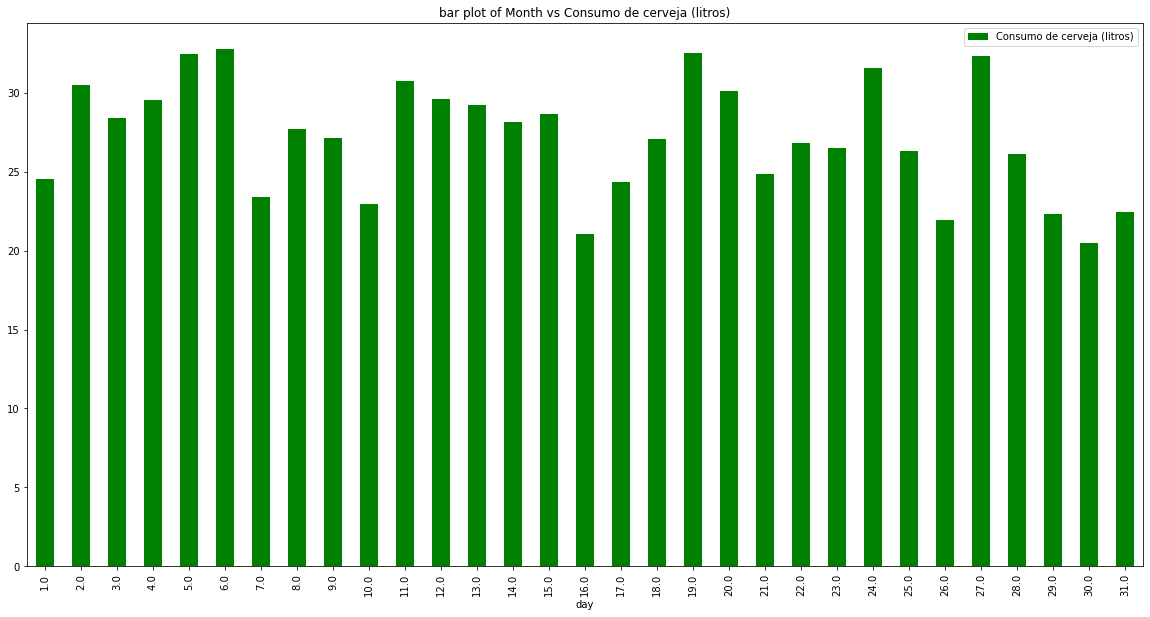

In [34]:
df4.plot(kind='bar',x='day',y='Consumo de cerveja (litros)', figsize=(20, 10), color='green', title='bar plot of Month vs Consumo de cerveja (litros)')

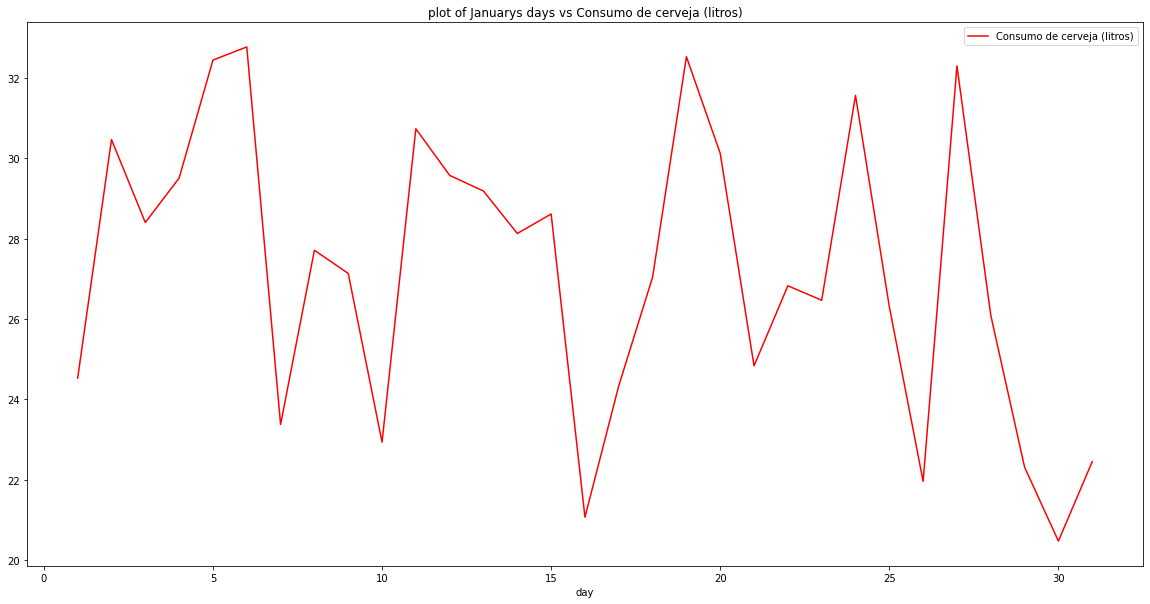

In [35]:
# Line plot
df4.plot(kind='line',x='day',y='Consumo de cerveja (litros)', color='red', figsize=(20,10), title = 'plot of Januarys days vs Consumo de cerveja (litros)')

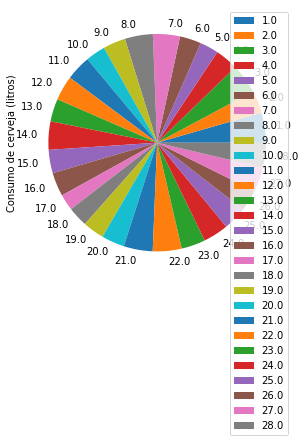

In [36]:
#Pie Chart
df4=df4.set_index('day')
plot = df3.plot.pie(y='Consumo de cerveja (litros)', figsize=(5, 5))

### Comments

The 5th, 6th, 19th and 27th day have the highest consumption rate for the month of December

<Figure size 432x432 with 0 Axes>

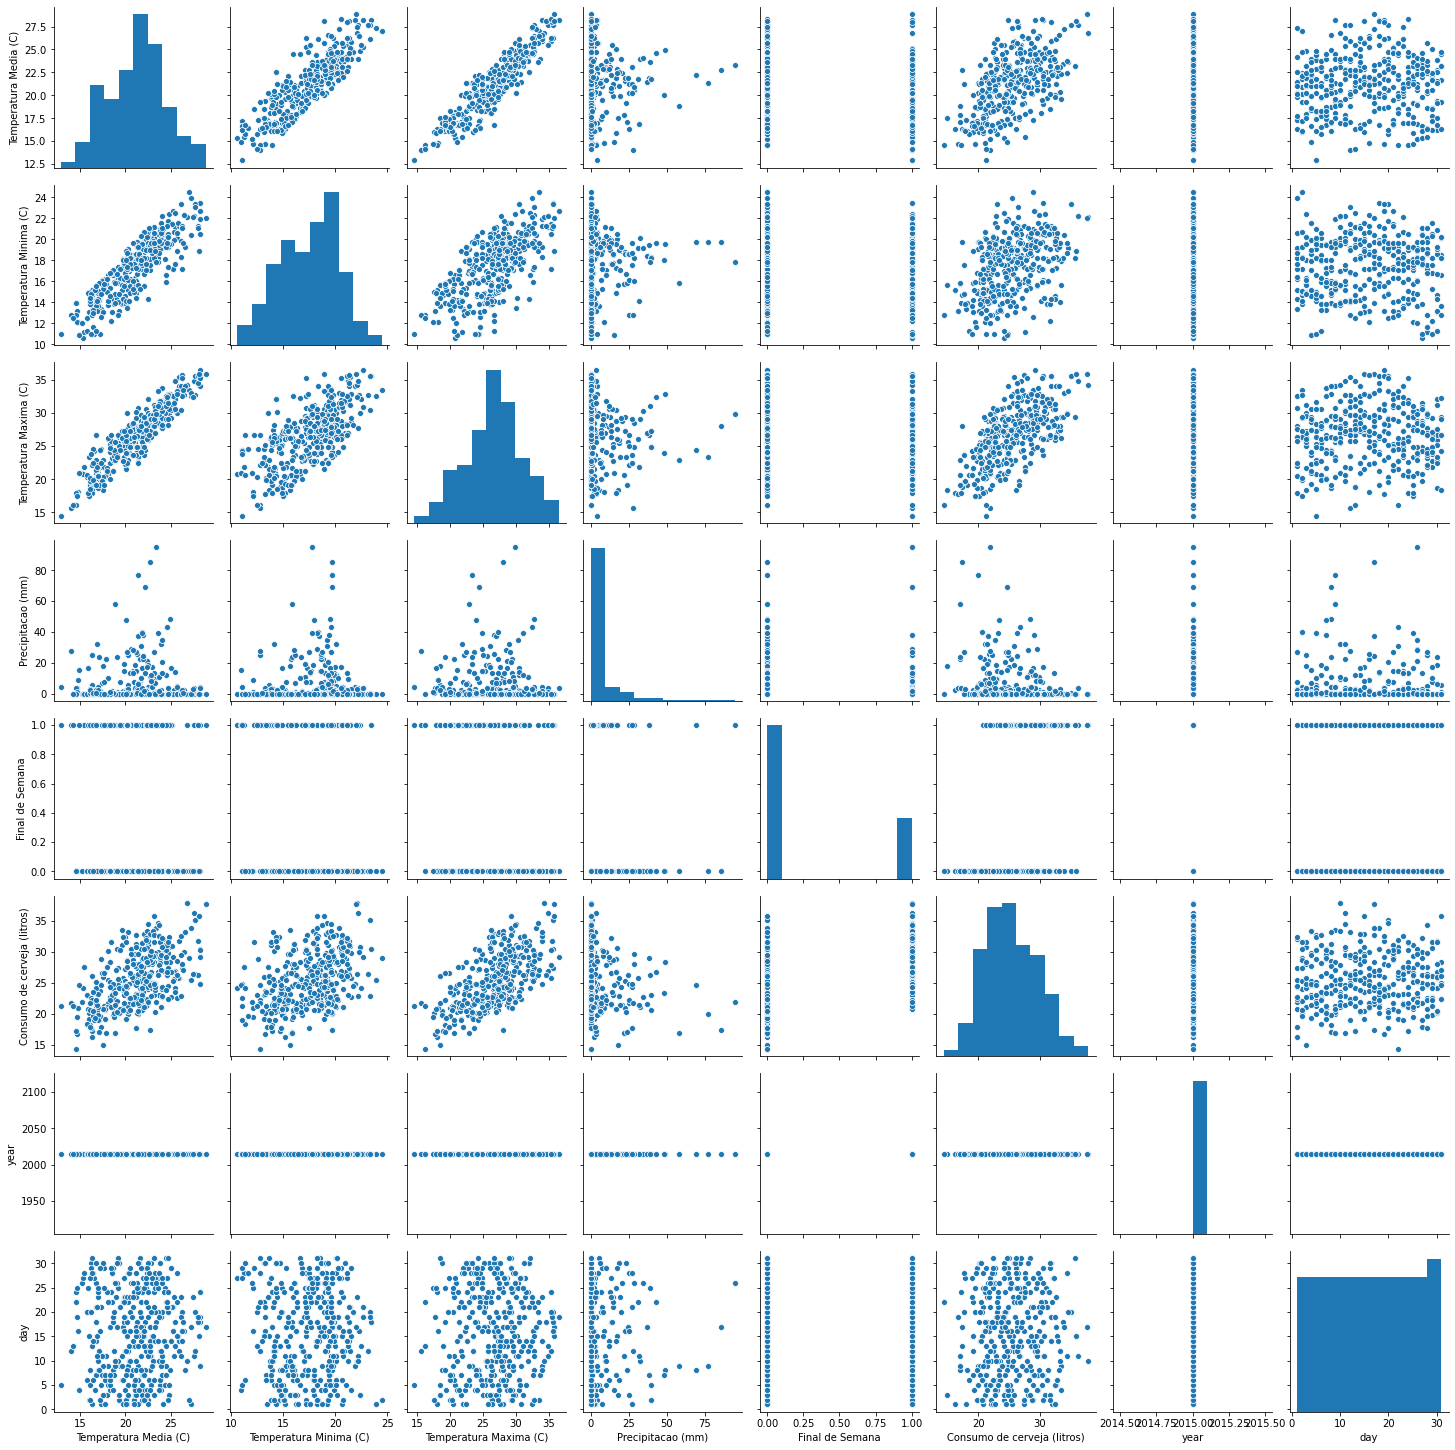

In [37]:
#Visualising all numeric variable
plt.figure(figsize=(6,6))
sns.pairplot(df) # A pairs plot allows us to see both distribution of single variables and relationships between two
plt.show()

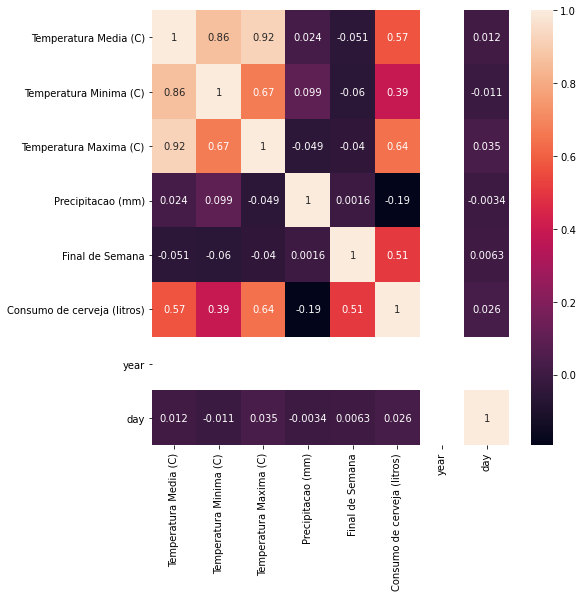

In [38]:
#Find correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True)

## Splitting my dataset into train and test data

In [39]:
df.head()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0 2015-01-01                  27.30                    23.9   
1 2015-01-02                  27.02                    24.5   
2 2015-01-03                  24.82                    22.4   
3 2015-01-04                  23.98                    21.5   
4 2015-01-05                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0              0.0   
1                    33.5                0.0              0.0   
2                    29.9                0.0              1.0   
3                    28.6                1.2              1.0   
4                    28.3                0.0              0.0   

   Consumo de cerveja (litros)    year    month  day  
0                       25.461  2015.0  January  1.0  
1                       28.972  2015.0  January  2.0  
2                       30.814  2015.0  January  3.0  
3                       29.799  2015.0  January  4.0  
4                       28.900  2015.0  January  5.0

In [40]:
df.tail()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
936  NaT                    NaN                     NaN   
937  NaT                    NaN                     NaN   
938  NaT                    NaN                     NaN   
939  NaT                    NaN                     NaN   
940  NaT                    NaN                     NaN   

     Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
936                     NaN                NaN              NaN   
937                     NaN                NaN              NaN   
938                     NaN                NaN              NaN   
939                     NaN                NaN              NaN   
940                     NaN                NaN              NaN   

     Consumo de cerveja (litros)  year month  day  
936                          NaN   NaN   nan  NaN  
937                          NaN   NaN   nan  NaN  
938                          NaN   NaN   nan  NaN  
939                          NaN   NaN   nan  NaN  
940                          NaN   NaN   nan  NaN

In [41]:
df.pop('year')
df.pop('month')
df.pop('day')
df.pop('Data')
df=df.dropna()

In [42]:
df.shape

(365, 6)

In [43]:
df.tail()

Temperatura Media (C)  Temperatura Minima (C)  Temperatura Maxima (C)  \
360                  24.00                    21.1                    28.2   
361                  22.64                    21.1                    26.7   
362                  21.68                    20.3                    24.1   
363                  21.38                    19.3                    22.4   
364                  24.76                    20.2                    29.0   

     Precipitacao (mm)  Final de Semana  Consumo de cerveja (litros)  
360               13.6              1.0                       32.307  
361                0.0              0.0                       26.095  
362               10.3              0.0                       22.309  
363                6.3              0.0                       20.467  
364                0.0              0.0                       22.446

In [44]:
np.random.seed(0)
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 50 )

In [45]:
train_df.head()

Temperatura Media (C)  Temperatura Minima (C)  Temperatura Maxima (C)  \
103                  21.70                    18.4                    28.8   
362                  21.68                    20.3                    24.1   
135                  17.18                    13.2                    22.3   
335                  22.10                    18.2                    29.4   
328                  21.26                    19.3                    24.8   

     Precipitacao (mm)  Final de Semana  Consumo de cerveja (litros)  
103                0.0              0.0                       22.001  
362               10.3              0.0                       22.309  
135                0.0              1.0                       23.702  
335                0.0              0.0                       30.471  
328                0.4              0.0                       25.119

In [46]:
test_df.head()

Temperatura Media (C)  Temperatura Minima (C)  Temperatura Maxima (C)  \
198                  20.20                    18.2                    23.8   
89                   23.14                    20.1                    29.0   
65                   21.92                    19.4                    26.6   
137                  18.60                    16.6                    21.3   
34                   22.12                    19.9                    23.7   

     Precipitacao (mm)  Final de Semana  Consumo de cerveja (litros)  
198                0.0              1.0                       24.827  
89                 1.0              0.0                       24.925  
65                38.2              1.0                       29.090  
137                0.0              0.0                       21.073  
34                 3.2              0.0                       24.738

In [47]:
train_df.shape, test_df.shape

((292, 6), (73, 6))

### Splitting dependent from independent variables

In [48]:
# splitting dependent(X_train, X_test) from independent variable(y_train, y_test)
y_train = train_df.pop("Consumo de cerveja (litros)")
X_train = train_df
y_test = test_df.pop("Consumo de cerveja (litros)")
X_test = test_df

## creating my model

In [49]:
from sklearn.linear_model import LinearRegression
model= LinearRegression().fit(X_train, y_train)

In [50]:
# Coefficients
model.coef_

array([-0.05688331,  0.03813296,  0.71438007, -0.06297447,  5.22639777])

In [51]:
print("Intercept: ", model.intercept_)

Intercept:  5.7219363387745865


In [52]:
coeff = pd.DataFrame(model.coef_, X_train.columns, columns=['coefficient'])
coeff

coefficient
Temperatura Media (C)     -0.056883
Temperatura Minima (C)     0.038133
Temperatura Maxima (C)     0.714380
Precipitacao (mm)         -0.062974
Final de Semana            5.226398

## Ordinary Least Square (OLS) regression result

In [53]:
import statsmodels.api as sm # it is a library that provides classes and functions for the estimation of many different statistical models.
m = sm.OLS(y_train, X_train)
results = m.fit()
print(results.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Consumo de cerveja (litros)   R-squared (uncentered):                   0.991
Model:                                     OLS   Adj. R-squared (uncentered):              0.990
Method:                          Least Squares   F-statistic:                              6089.
Date:                         Sat, 29 May 2021   Prob (F-statistic):                   6.98e-289
Time:                                 05:10:18   Log-Likelihood:                         -680.38
No. Observations:                          292   AIC:                                      1371.
Df Residuals:                              287   BIC:                                      1389.
Df Model:                                    5                                                  
Covariance Type:                     nonrobust                                                  
                             c

### Observations

There are 5 independent variables and y is the dependent variables. In OLS regression it is assumed that all the variables are directly depended on the ‘y’ variables and they do not have any co-relationship with each other. 

Two variables have a negative relationship with the dependent variable ‘y’ and other variables have a positive relationship.  This implies that Temperatura Media (C) and Precipitacao (mm) have a negative correlation with y variable. 

The ideal value of R2 should be 1 and adjusted R should be a bit less than the 1l. Our values for R2 and R are very close to 1 which means our model is goofd

The values of F-statistics is far greater than 0, which means the model is significant.  



R-squared is also called the coefficient of determination. It’s a statistical measure of how well the regression line fits the data. The greater the value of R, the better our model

In [54]:
model.score(X_train, y_train)

0.7172280428252606

## Prediction on the test score

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([27.49555694, 25.82617679, 27.03811678, 20.51320954, 21.95181295,
       20.49118122, 23.86137203, 24.37335245, 29.54718387, 27.22161348,
       23.51284414, 30.90833144, 29.23600434, 18.39748584, 27.65847563,
       27.16588151, 29.09847232, 23.33630166, 30.65597202, 19.5587386 ,
       24.1176289 , 24.43879979, 23.46388221, 30.35034565, 29.47317334,
       28.22339979, 27.35964478, 17.70384368, 30.36221445, 23.9103549 ,
       19.31334179, 24.67874657, 20.67911577, 24.76003543, 28.76960475,
       29.27295008, 24.93386919, 19.98862023, 20.81396185, 29.14391574,
       23.04989983, 26.06835528, 23.28321218, 23.05497044, 17.05414999,
       27.9620655 , 19.97309661, 30.7598318 , 20.59244247, 21.30092359,
       29.05093938, 35.72041363, 24.75311652, 30.58456201, 23.58398736,
       19.14141686, 27.87970322, 17.71326169, 21.66919551, 23.05663486,
       22.55415668, 26.02953791, 24.50890705, 32.94394787, 23.97460549,
       23.42305608, 28.96477376, 26.22232385, 22.97930471, 32.37

### R2 score

In [58]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred)

0.7389423417211936

Interpretation of R2 score:

R2 = 0.74

It can be referred that 74% of the changeability of the dependent output attribute can be explained by the model while the remaining 26% of the variability is still unaccounted for.
R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results

R Squared: R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 90.11, which indicates that 74% of the data fit the regression model.

## Actual values and the predicted values

In [59]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

Actual value  Predicted value
198        24.827        27.495557
89         24.925        25.826177
65         29.090        27.038117
137        21.073        20.513210
34         24.738        21.951813

In [60]:
mlr_diff.tail()

Actual value  Predicted value
145        22.162        22.979305
345        29.579        32.376131
261        31.836        35.520700
50         24.567        25.288784
212        32.467        29.228118

## Plot

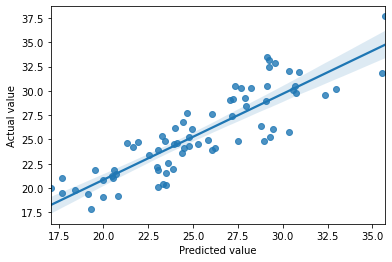

In [62]:
# draw regplot
sns.regplot(x = "Predicted value", 
            y = "Actual value", 
            data = mlr_diff)
plt.show()

## Model Evaluation

In [63]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

Mean Absolute Error: 1.8632894125803598
Mean Square Error: 4.806699422278222
Root Mean Square Error: 2.1924186238668524


### Mean Absolute Error: 

Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 1.863, which is pretty good as it is close to 0.

### Mean Square Error:

Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 4.807, which is pretty good.

### Root Mean Square Error: 

Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 2.192, which is pretty good.

## Conclusion

The Multiple Linear Regression model performs well as 74% of the data fit the regression model. Also, the mean absolute error, mean square error, and the root mean square error are less.
